# Определение энергии $\alpha$-частиц по величине их пробега в воздухе.

## Необходимые теоретические сведения.

Целью данной работы не является подробное описание теоретических предпосылок.
По ходу изложения будут приведены как хорошо известные формулы, так и относящиеся к более узкому классу задач. С их выводом читатель, при желании, может ознакомиться отдельно.




## Определение пробега $\alpha$-частиц с помощью сцинтилляционного счетчика.

Установка состоит и цилиндрической камеры, на дне которой установлен препарат.
Камера герметически закрыта стеклянной пластинкой, на которую с внутрнней стороны 
нанесен слой люминофора. С наружной стороны к стеклу прижат фотокатод фотоумножителя.
Расстояние между препаратом и люминофором составляет 9 см. Определение пробега сводится к измерению зависимости скорости счета от давления в камере, потому как при атмосферном давлении 
альфа-частица не в состоянии преодолеть расстояние до фотокатода.

Исследуемое вещество $ \sideset{_{94}^{239}}{}{Pu}$
.


P среднего пробега 269.9
k =  -1.91
Pэ =  308.7


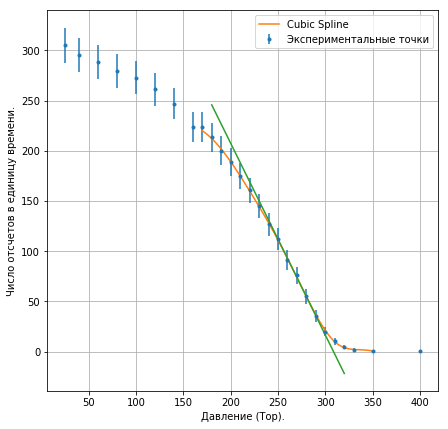

In [4]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import mlab
from scipy import interpolate
from math import* 
import warnings
warnings.filterwarnings('ignore')

def d_fun(x):
    h = 1e-5
    return (interpolate.splev(x+h, tck, der=0)-interpolate.splev(x-h, tck, der=0))/(2*h)

# парсинг данных
data = pd.read_table('scincill_counter', sep = '\s+' )
x = data['x']
y = data['y']

yErr = [sqrt(elem) for elem in y]
xlist = mlab.frange(x[8],x[25],0.005)

# приближение сплайном
tck = interpolate.splrep(x[:26], y[:26], s=50, k = 3 )
yder = interpolate.splev(xlist, tck, der=0)

# вычисление точки с минимальной производной
def d_fun(x):
    h = 1e-5
    return (interpolate.splev(x+h, tck, der=0)-interpolate.splev(x-h, tck, der=0))/(2*h)

dxlist = mlab.frange(x[8],x[24],0.9)
current_min = 10;
current_elem = 0;
for elem in dxlist:
    tmp = d_fun(elem)
    if(tmp < current_min):
        current_min = tmp
        current_elem = elem
print("P среднего пробега", current_elem)
print("k = ", current_min.round(2))

# вычисление касательной
xp = 269.9
k = -1.91
yp = interpolate.splev(xp, tck, der=0)
b = yp - k*xp
def ptangent(x, k_= k, b_=b):
    return(k_* x+b_)
xlist_ = mlab.frange(x[9],x[23],0.005)
ylist = []
for elem in xlist_:
    ylist.append(ptangent(elem))
# вычисление P - экстраполяционного.
print("Pэ = ",(-b/k).round(1))
  
    
# визуализация   
plt.figure(figsize= (7,7)) 
plt.errorbar(x,y,yerr = yErr, fmt='.', label='Экспериментальные точки')
plt.plot(xlist,yder,label = "Cubic Spline")
plt.plot(xlist_,ylist)
plt.xlabel("Давление (Тор).")
plt.ylabel("Число отсчетов в единицу времени.")
plt.grid()
plt.legend();


Строю график зависимости числа отсчетов в единицу времени от давления. В области предполагаемого минимума производной $\frac{dN}{dP}$ приближаю зависимость сплайном и 
численно нахожу минимум. Так я получаю Pс $\approx$ 270 Тор. Далее нахожу точку пересечения 
касательной в точке Pc с осью P, так нахожу P экстраполированное - Pэ $\approx$ 309 Тор.

Выражаю $\rho$ из уравнения Менделеева - Клапейрона:
\begin{equation} 
\rho = \frac{MP}{RT}
\end{equation}

Таким образом $\rho$c $\approx$ $4.3\cdot10^{-4}$ г/см^3 , $\rho$э $\approx$ $4.9\cdot10^{-4}$ г/см^3 , при T = 290 K.
Оценю характерную длину пробега в см $\alpha$-частиц с данной энергией при атмосферном давлении. $\rho \cdot x = const$, так, $R$ $\approx$ 3.5 см.

В рамках данной задачи связь энергии $\alpha$-частицы с ее пробегом может быть вырожена формулой:
\begin{equation} 
R = 0.32\cdot E^{3/2}
\end{equation}

Оценим значение энергии $\alpha$-частицы: E $\approx$ 4.9 МэВ, табличное значение ~ 5 МэВ.


## Исследование пробега $\alpha$-частиц - счетчик Гейгера.

Rcр 17.9
k =  -7.39
Rэ =  18.9


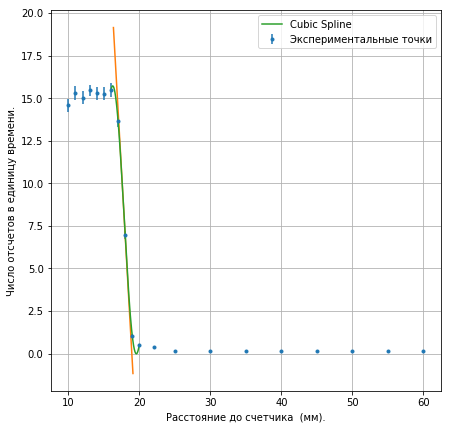

In [5]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import mlab
from scipy import interpolate
from math import* 
import warnings
warnings.filterwarnings('ignore')
from numpy import*

def d_fun(x):
    h = 1e-5
    return (interpolate.splev(x+h, tck, der=0)-interpolate.splev(x-h, tck, der=0))/(2*h)

# парсинг данных
data = pd.read_table('geiger', sep = '\s+' )
x = data['x']
y = data['y']
yErr = data['yerr']

xlist = mlab.frange(x[6],x[10],0.005)

# приближение сплайном
tck = interpolate.splrep(x[6:12], y[6:12], s=100, k = 5 )
yder = interpolate.splev(xlist, tck, der=0)


# вычисление точки с минимальной производной
def d_fun(x):
    h = 1e-5
    return (interpolate.splev(x+h, tck, der=0)-interpolate.splev(x-h, tck, der=0))/(2*h)

dxlist = mlab.frange(x[7],x[10],0.9)
current_min = 10;
current_elem = 0;
for elem in dxlist:
    tmp = d_fun(elem)
    if(tmp < current_min):
        current_min = tmp
        current_elem = elem
print("Rcр", current_elem)
print("k = ", current_min.round(2))


# вычисление касательной
xp = 17.9
k = -7.39
yp = interpolate.splev(xp, tck, der=0)
b = yp - k*xp
def ptangent(x, k_= k, b_=b):
    return(k_* x+b_)
xlist_ = mlab.frange(x[6]+0.35,x[9]+0.1,0.005)
ylist = []
for elem in xlist_:
    ylist.append(ptangent(elem))
# вычисление P - экстраполяционного.
print("Rэ = ",(-b/k).round(1))

     
# визуализация   
plt.figure(figsize= (7,7)) 
plt.errorbar(x,y,yerr = yErr, fmt='.', label='Экспериментальные точки')
plt.plot(xlist_,ylist)
plt.plot(xlist,yder,label = "Cubic Spline")
plt.xlabel("Расстояние до счетчика  (мм).")
plt.ylabel("Число отсчетов в единицу времени.")
plt.grid()
plt.legend();


Как и в предыдущем пункте работы определяем Rср $\approx$ 1.8 cм, Rэ $\approx$ 2 см, E $\approx$ 3.5 МэВ, табличное значение ~ 5 МэВ.

## Определение пробега $\alpha$-частиц с помощью ионизационной камеры.

Камера представляет собой наполненный газом сосуд с двумя электродами, расстояние между которыми 10см. Заполняющий сосуд газ сам по себе не проводит электрический ток, возникает он только при прохождении быстрой $\alpha$-частицы, которая рождает в газе на своем пути ионы.
Если число проходящих через камеру $\alpha$-частиц достаточно велико, то можно регистрировать величину возникающего тока при постоянном напряжении на электродах.
В ходе работы была получена зависимость ионизационного тока от давления в камере.
При некотором давлении Pэ все $\alpha$-частицы останавливаются внутри газа и сила тока прекращает рост. Для получения значения Pэ часто пользуются методом экстраполяции.
В данной работе мы поступим именно так.
Исследуемое вещество $ \sideset{_{94}^{239}}{}{Pu}$
.

Pэ =  572.9


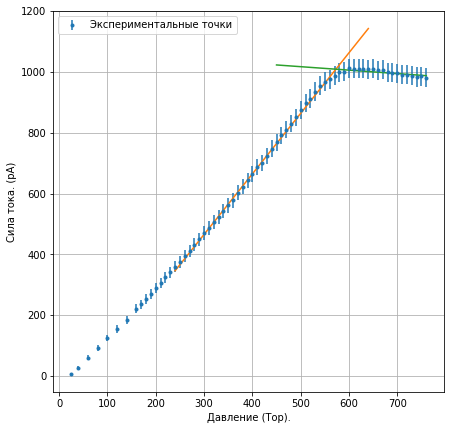

In [3]:
'''
нулевое показание цифрового табло - 1 pA.
показания при атмосферном давлениии -  985 pA.
'''


data = pd.read_table('ionization_chamber', sep = '\s+' )
x = data['x']
y = data['y']
yErr = [sqrt(elem) for elem in y]
xlist1 = mlab.frange (x[15], x[55], 0.005)
xlist2 = mlab.frange (x[36], x[len(x)-1], 0.005)

# Вычитаю нулевое значение тока:
for elem in y:
    elem - 1
    
# провожу фитирование прямой двух участков гравика:
def myFunction(x, a, b): 
    return a*x+b

result1 = curve_fit(f = myFunction, xdata= x[20:38], ydata=y[20:38], sigma = yErr[20:38],absolute_sigma = True )
popt1, pcov1 = result1
k1 = popt1[0]
b1 = popt1[1]

result2 = curve_fit(f = myFunction, xdata= x[48:], ydata=y[48:], sigma = yErr[48:],absolute_sigma = True )
popt2, pcov2 = result2
k2 = popt2[0]
b2 = popt2[1]

# нахожу точку пересечения прямых
P  = (b2-b1)/(k1-k2)
print("Pэ = ", P.round(1))

plt.figure(figsize= (7,7)) 
plt.errorbar(x,y,yerr = yErr, fmt='.', label='Экспериментальные точки') 
plt.plot(xlist1, myFunction(xlist1, *popt1))
plt.plot(xlist2, myFunction(xlist2, *popt2))
plt.xlabel("Давление (Тор).")
plt.ylabel("Сила тока. (pA)")
plt.grid()
plt.legend();

Находим точку пересечения прямых, приближающих участок "постоянного" тока и участок линейного роста. Pэ $\approx$ 573 Тор.
Выражаю $\rho$ из уравнения Менделеева - Клапейрона:
\begin{equation} 
\rho = \frac{MP}{RT}
\end{equation}
Таким образом $\rho$э $\approx$ $8.9\cdot10^{-4}$.
Теперь рассчитываем длину пробега при атмосферном давлении:

$R$ $\approx$ 6.9 см.

В рамках данной задачи связь энергии $\alpha$-частицы с ее пробегом может быть вырожена формулой:
\begin{equation} 
R = 0.32\cdot E^{3/2}
\end{equation}

Оценим значение энергии $\alpha$-частицы: E $\approx$ 7.7 МэВ, табличное значение ~ 5 МэВ.


## Вывод
В ходе данной работы тремя различными способами была определена энергия $\alpha$-частиц по величине их пробега в воздухе. Одним из методов было получено весьма точное значение.
